# Exercises chapter 3

## Exercise 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [4]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

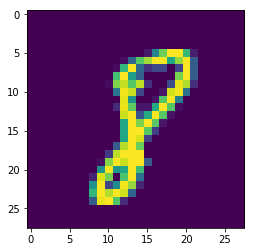

In [6]:
plt.imshow(X_train[np.random.choice(60000, size=1)].reshape(28, 28))

In [7]:
from sklearn.base import BaseEstimator
class ManualScaler(BaseEstimator):
    
    def __init__(self, max_val=255):
        self.max_val = max_val
    
    def fit(self, X, y=Null):
        return self
    
    def transform(self, X, y=Null):
        return X / self.max_val

NameError: name 'BaseEstimator' is not defined

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    'scale' = 
])